In [1]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine as ce
!pip install pymysql

In [2]:
#Read dataset
df = pd.read_excel('COVID-19 di Indonesia excel.xlsx')
df.head()

Date  Kasus harian  Kasus Impor  Kasus Lokal  Total kasus  \
0 2020-03-02           2.0          0.0          2.0          2.0   
1 2020-03-03           0.0          0.0          0.0          2.0   
2 2020-03-04           0.0          0.0          0.0          2.0   
3 2020-03-05           0.0          0.0          0.0          2.0   
4 2020-03-06           2.0          0.0          2.0          4.0   

   Kasus aktif  Persentase kasus aktif  Sembuh\n(baru)  Sembuh  \
0          2.0                     1.0             0.0     0.0   
1          2.0                     1.0             0.0     0.0   
2          2.0                     1.0             0.0     0.0   
3          2.0                     1.0             0.0     0.0   
4          4.0                     1.0             0.0     0.0   

   Tingkat kesembuhan (seluruh kasus)  ...  Positif DKI  Unnamed: 76  \
0                                 0.0  ...          NaN          NaN   
1                                 0.0  ...          NaN          NaN   
2                                 0.0  ...          NaN          NaN   
3                                 0.0  ...          NaN          NaN   
4                                 0.0  ...          NaN          NaN   

   Pos Rate DKI  Pos Rate DKI - 7 harian  NON DKI  Positif Non DKI  \
0           NaN                      NaN      NaN              NaN   
1           NaN                      NaN      NaN              NaN   
2           NaN                      NaN      NaN              NaN   
3           NaN                      NaN      NaN              NaN   
4           NaN                      NaN      NaN              NaN   

   Unnamed: 81  Pos Rate Non DKI  Pos Rate Non DKI - 7 harian  CFR  
0          NaN               NaN                          NaN  NaN  
1          NaN               NaN                          NaN  NaN  
2          NaN               NaN                          NaN  NaN  
3          NaN               NaN                          NaN  NaN  
4          NaN               NaN                          NaN  NaN  

[5 rows x 85 columns]

In [3]:
#save data to csv
df.to_csv('data_covid1.csv',index=False)

data = pd.read_csv('data_covid1.csv')
data.head(22)

Date  Kasus harian  Kasus Impor  Kasus Lokal  Total kasus  \
0   2020-03-02           2.0          0.0          2.0          2.0   
1   2020-03-03           0.0          0.0          0.0          2.0   
2   2020-03-04           0.0          0.0          0.0          2.0   
3   2020-03-05           0.0          0.0          0.0          2.0   
4   2020-03-06           2.0          0.0          2.0          4.0   
5   2020-03-07           0.0          0.0          0.0          4.0   
6   2020-03-08           2.0          1.0          1.0          6.0   
7   2020-03-09          13.0          7.0          6.0         19.0   
8   2020-03-10           8.0          5.0          3.0         27.0   
9   2020-03-12           0.0          0.0          0.0         34.0   
10  2020-03-13          35.0          NaN          NaN         69.0   
11  2020-03-14          27.0          NaN          NaN         96.0   
12  2020-03-15          21.0          NaN          NaN        117.0   
13  2020-03-16          17.0          NaN          NaN        134.0   
14  2020-03-17          38.0          NaN          NaN        172.0   
15  2020-03-18          55.0          NaN          NaN        227.0   
16  2020-03-19          82.0          NaN          NaN        309.0   
17  2020-03-20          60.0          NaN          NaN        369.0   
18  2020-03-21          81.0          NaN          NaN        450.0   
19  2020-03-22          64.0          NaN          NaN        514.0   
20  2020-03-23          65.0          NaN          NaN        579.0   
21  2020-03-24         106.0          NaN          NaN        685.0   

    Kasus aktif  Persentase kasus aktif  Sembuh\n(baru)  Sembuh  \
0           2.0                1.000000             0.0     0.0   
1           2.0                1.000000             0.0     0.0   
2           2.0                1.000000             0.0     0.0   
3           2.0                1.000000             0.0     0.0   
4           4.0                1.000000             0.0     0.0   
5           4.0                1.000000             0.0     0.0   
6           6.0                1.000000             0.0     0.0   
7          19.0                1.000000             0.0     0.0   
8          27.0                1.000000             0.0     0.0   
9          27.0                0.794118             1.0     3.0   
10         60.0                0.869565             2.0     5.0   
11         83.0                0.864583             3.0     8.0   
12        104.0                0.888889             0.0     8.0   
13        121.0                0.902985             0.0     8.0   
14        156.0                0.906977             1.0     9.0   
15        197.0                0.867841             2.0    11.0   
16        269.0                0.870550             4.0    15.0   
17        321.0                0.869919             1.0    16.0   
18        392.0                0.871111             4.0    20.0   
19        437.0                0.850195             9.0    29.0   
20        500.0                0.863558             1.0    30.0   
21        600.0                0.875912             0.0    30.0   

    Tingkat kesembuhan (seluruh kasus)  ...  Positif DKI  Unnamed: 76  \
0                             0.000000  ...          NaN          NaN   
1                             0.000000  ...          NaN          NaN   
2                             0.000000  ...          NaN          NaN   
3                             0.000000  ...          NaN          NaN   
4                             0.000000  ...          NaN          NaN   
5                             0.000000  ...          NaN          NaN   
6                             0.000000  ...          NaN          NaN   
7                             0.000000  ...          NaN          NaN   
8                             0.000000  ...          NaN          NaN   
9                             0.088235  ...          NaN          NaN   
10                            0

In [4]:
# Change data type
data['Date'] = pd.to_datetime(data['Date'], format='%Y/%m/%d')

In [5]:
# data type check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 85 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date                                               657 non-null    datetime64[ns]
 1   Kasus harian                                       657 non-null    float64       
 2   Kasus Impor                                        10 non-null     float64       
 3   Kasus Lokal                                        10 non-null     float64       
 4   Total kasus                                        657 non-null    float64       
 5   Kasus aktif                                        657 non-null    float64       
 6   Persentase kasus aktif                             657 non-null    float64       
 7   Sembuh
(baru)                                      657 non-null    float64       
 8   Sembuh              

In [6]:
# Missing Value Percentage check
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Assuming df is your DataFrame
# Calculate the number of missing values in each column
missing_values = data.isnull().sum()

# Calculate the percentage of missing values in each column
percentage_missing = (missing_values / len(data)) * 100

# Sort the percentage_missing Series in descending order
percentage_missing_sorted = percentage_missing.sort_values(ascending=False)

print("Persentase Missing Values pada Setiap Kolom (Descending):")
print(percentage_missing_sorted)

Persentase Missing Values pada Setiap Kolom (Descending):
Vaksinasi (ineligible)                               99.556869
Kasus Impor                                          98.522895
Kasus Lokal                                          98.522895
ODP                                                  86.558346
PDP                                                  86.558346
Dosis kedua (Vakgor)                                 82.127031
Dosis pertama (Vakgor)                               82.127031
Dosis ketiga (SDM kesehatan)                         81.683900
Dosis ketiga                                         81.683900
Pos Rate DKI - 7 harian                              79.172821
Pos Rate DKI                                         79.172821
Unnamed: 76                                          79.172821
Positif DKI                                          79.172821
Test Orang DKI                                       79.172821
Unnamed: 81                                          79.1728

#### Because this is daily data, it is best to input it with a value of 0, considered as data that is unknown or not yet recorded.

In [7]:
data.fillna(value=0, inplace=True)

In [8]:
data

Date  Kasus harian  Kasus Impor  Kasus Lokal  Total kasus  \
0    2020-03-02 00:00:00           2.0          0.0          2.0          2.0   
1    2020-03-03 00:00:00           0.0          0.0          0.0          2.0   
2    2020-03-04 00:00:00           0.0          0.0          0.0          2.0   
3    2020-03-05 00:00:00           0.0          0.0          0.0          2.0   
4    2020-03-06 00:00:00           2.0          0.0          2.0          4.0   
5    2020-03-07 00:00:00           0.0          0.0          0.0          4.0   
6    2020-03-08 00:00:00           2.0          1.0          1.0          6.0   
7    2020-03-09 00:00:00          13.0          7.0          6.0         19.0   
8    2020-03-10 00:00:00           8.0          5.0          3.0         27.0   
9    2020-03-12 00:00:00           0.0          0.0          0.0         34.0   
10   2020-03-13 00:00:00          35.0          0.0          0.0         69.0   
11   2020-03-14 00:00:00          27.0          0.0          0.0         96.0   
12   2020-03-15 00:00:00          21.0          0.0          0.0        117.0   
13   2020-03-16 00:00:00          17.0          0.0          0.0        134.0   
14   2020-03-17 00:00:00          38.0          0.0          0.0        172.0   
15   2020-03-18 00:00:00          55.0          0.0          0.0        227.0   
16   2020-03-19 00:00:00          82.0          0.0          0.0        309.0   
17   2020-03-20 00:00:00          60.0          0.0          0.0        369.0   
18   2020-03-21 00:00:00          81.0          0.0          0.0        450.0   
19   2020-03-22 00:00:00          64.0          0.0          0.0        514.0   
20   2020-03-23 00:00:00          65.0          0.0          0.0        579.0   
21   2020-03-24 00:00:00         106.0          0.0          0.0        685.0   
22   2020-03-25 00:00:00         105.0          0.0          0.0        790.0   
23   2020-03-26 00:00:00         103.0          0.0          0.0        893.0   
24   2020-03-27 00:00:00         153.0          0.0          0.0       1046.0   
25   2020-03-28 00:00:00         109.0          0.0          0.0       1155.0   
26   2020-03-29 00:00:00         130.0          0.0          0.0       1285.0   
27   2020-03-30 00:00:00         129.0          0.0          0.0       1414.0   
28   2020-03-31 00:00:00         114.0          0.0          0.0       1528.0   
29   2020-04-01 00:00:00         149.0          0.0          0.0       1677.0   
30   2020-04-02 00:00:00         113.0          0.0          0.0       1790.0   
31   2020-04-03 00:00:00         196.0          0.0          0.0       1986.0   
32   2020-04-04 00:00:00         106.0          0.0          0.0       2092.0   
33   2020-04-05 00:00:00         181.0          0.0          0.0       2273.0   
34   2020-04-06 00:00:00         218.0          0.0          0.0       2491.0   
35   2020-04-07 00:00:00         247.0          0.0          0.0       2738.0   
36   2020-04-08 00:00:00         218.0          0.0          0.0       2956.0   
37   2020-04-09 00:00:00         337.0          0.0          0.0       3293.0   
38   2020-04-10 00:00:00         219.0          0.0          0.0       3512.0   
39   2020-04-11 00:00:00         330.0          0.0          0.0       3842.0   
40   2020-04-12 00:00:00         399.0          0.0          0.0       4241.0   
41   2020-04-13 00:00:00         316.0          0.0          0.0       4557.0   
42   2020-04-14 00:00:00         282.0          0.0          0.0       4839.0   
43   2020-04-15 00:00:00         297.0          0.0          0.0       5136.0   
44   2020-04-16 00:00:00         380.0          0.0          0.0       5516.0   
45   2020-04-17 00:00:00         407.0          0.0          0.0       5923.0   
46   2020-04-18 00:00:00         325.0          0.0          0.0       6248.0   
47   2020-04-19 00:00:00         327.0          0.0          0.0       6575.0   
48   2020-04-20 00:00:00         185.0          0.0

In [9]:
# number of duplicated data
data.duplicated().sum()

16

####  Basic Statistic

In [10]:
nums = data.select_dtypes(exclude = 'object')
cats = data.select_dtypes(include = 'object')
datetime = data.select_dtypes(include = 'datetime')

In [11]:
nums.describe()

Kasus harian  Kasus Impor  Kasus Lokal   Total kasus    Kasus aktif  \
count    677.000000   677.000000   677.000000  6.770000e+02     677.000000   
mean    6293.259970     0.019202     0.020679  1.473062e+06   95585.963072   
std     9417.445639     0.332532     0.281875  1.556432e+06  118479.750569   
min        0.000000     0.000000     0.000000  0.000000e+00       0.000000   
25%      700.000000     0.000000     0.000000  1.063360e+05   17185.000000   
50%     3807.000000     0.000000     0.000000  8.824180e+05   60694.000000   
75%     6565.000000     0.000000     0.000000  2.256851e+06  120306.000000   
max    56757.000000     7.000000     6.000000  4.260544e+06  574135.000000   

       Persentase kasus aktif  Sembuh\n(baru)        Sembuh  \
count              677.000000      677.000000  6.770000e+02   
mean                 0.236428     6073.289513  1.331625e+06   
std                  0.265209     8922.372525  1.469409e+06   
min                  0.000000        0.000000  0.000000e+00   
25%                  0.057845      580.000000  6.429200e+04   
50%                  0.142452     3712.000000  7.186960e+05   
75%                  0.275567     6799.000000  1.915147e+06   
max                  1.000000    48832.000000  4.111619e+06   

       Tingkat kesembuhan (seluruh kasus)  Tingkat kesembuhan (closed cases)  \
count                          677.000000                         677.000000   
mean                             0.696488                           0.871053   
std                              0.300506                           0.227366   
min                              0.000000                           0.000000   
25%                              0.604612                           0.927066   
50%                              0.823175                           0.965690   
75%                              0.910456                           0.967824   
max                              0.965066                           0.971056   

       Meninggal\n(baru)  Meninggal\nDunia  Tingkat kematian (seluruh kasus)  \
count         677.000000        677.000000                        677.000000   
mean          212.703102      45851.395864                          0.037542   
std           353.795894      50810.356188                          0.018151   
min             0.000000          0.000000                          0.000000   
25%            35.000000       5058.000000                          0.027555   
50%           104.000000      25484.000000                          0.033387   
75%           191.000000      60027.000000                          0.042679   
max          2069.000000     144002.000000                          0.117647   

       Tingkat kematian (closed cases)           PDP            ODP  \
count                       677.000000    677.000000     677.000000   
mean                          0.086111   2275.943870   14647.404727   
std                           0.134245   6269.350171   49314.009552   
min                           0.000000      0.000000       0.000000   
25%                           0.030899      0.000000       0.000000   
50%                           0.034107      0.000000       0.000000   
75%                           0.055978      0.000000       0.000000   
max                           0.690265  35800.000000  270876.000000   

        Suspek aktif  Jumlah spesimen diperiksa (dari 1 April)  \
count     677.000000                              6.770000e+02   
mean    86947.872805                              1.426931e+07   
std     88204.889753                              1.616560e+07   
min         0.000000                              0.000000e+00   
25%     44222.000000                              1.477629e+06   
50%     67312.000000                              8.206401e+06   
75%     99634.000000                              2.036910e+07   
max    424799.000000                              6.020404e+07   

       Jumlah orang diperiksa       Negatif  Positif \n(=C)

In [12]:
cats.describe()

Date
count    677
unique   658
top        0
freq      20

### EDA

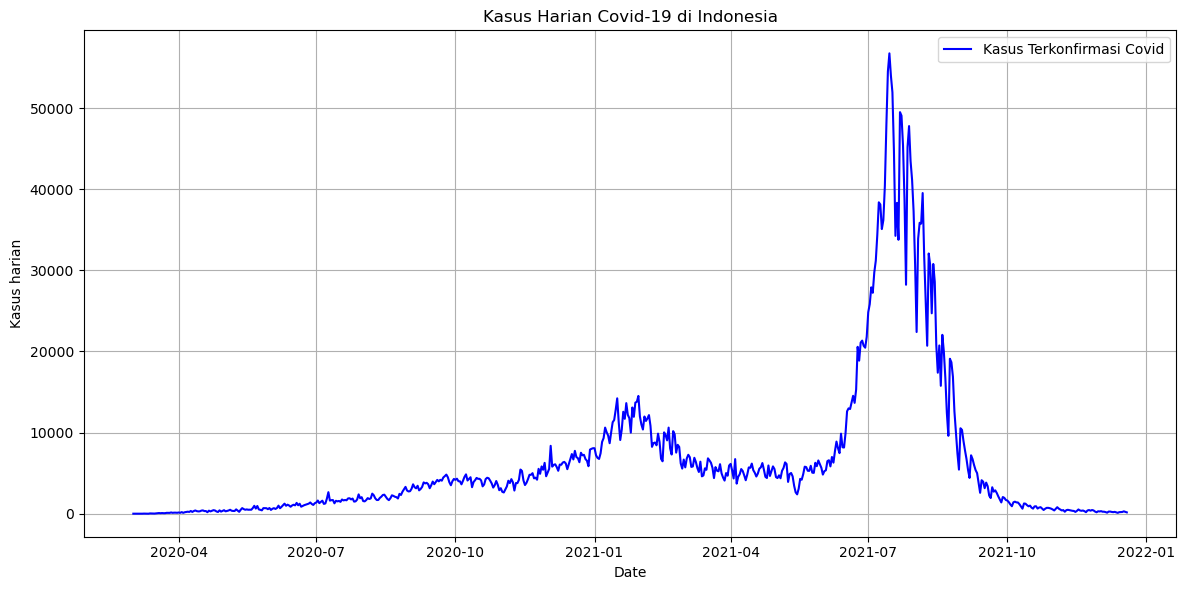

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Kasus harian'], color='blue', label='Kasus Terkonfirmasi Covid')
plt.title('Kasus Harian Covid-19 di Indonesia')
plt.xlabel('Date')
plt.ylabel('Kasus harian')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

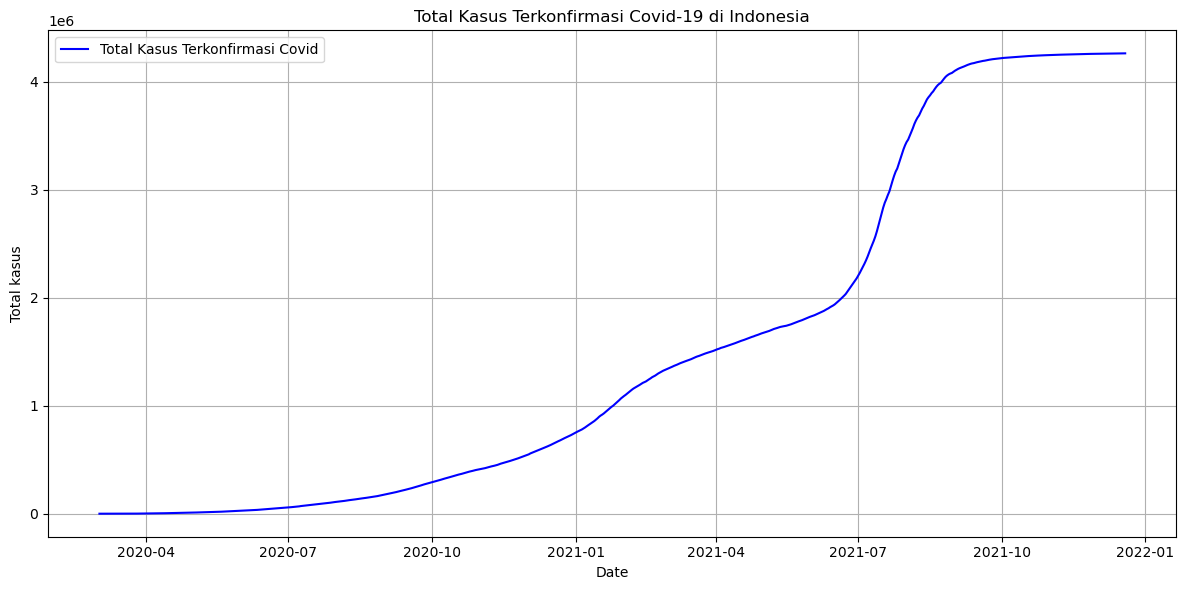

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Total kasus'], color='blue', label='Total Kasus Terkonfirmasi Covid')
plt.title('Total Kasus Terkonfirmasi Covid-19 di Indonesia')
plt.xlabel('Date')
plt.ylabel('Total kasus')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

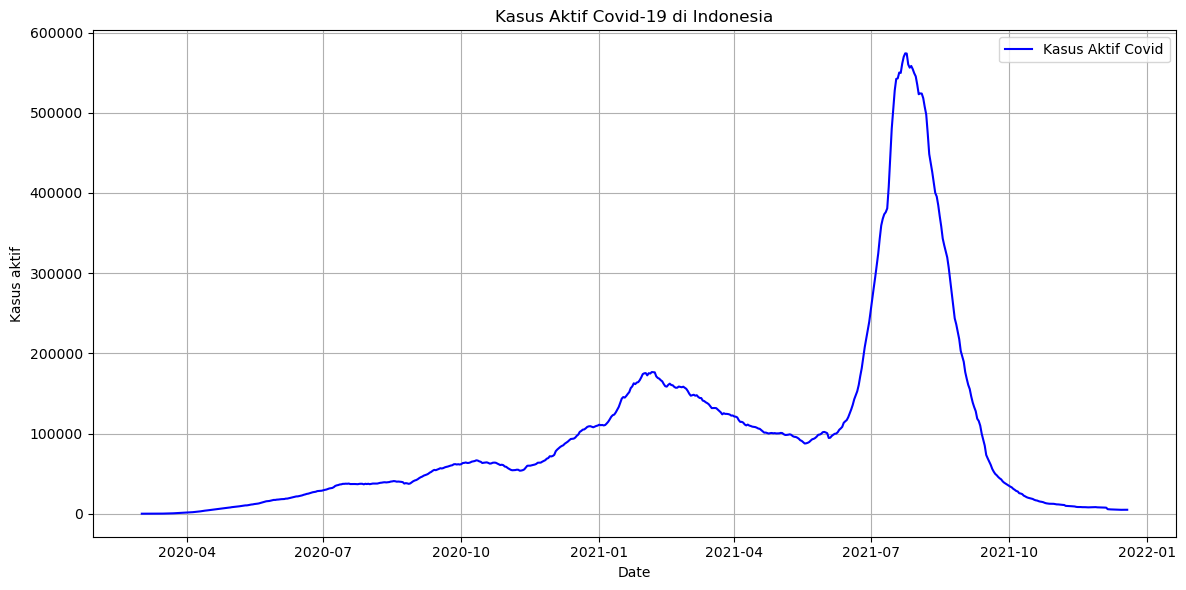

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Kasus aktif'], color='blue', label='Kasus Aktif Covid')
plt.title('Kasus Aktif Covid-19 di Indonesia')
plt.xlabel('Date')
plt.ylabel('Kasus aktif')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

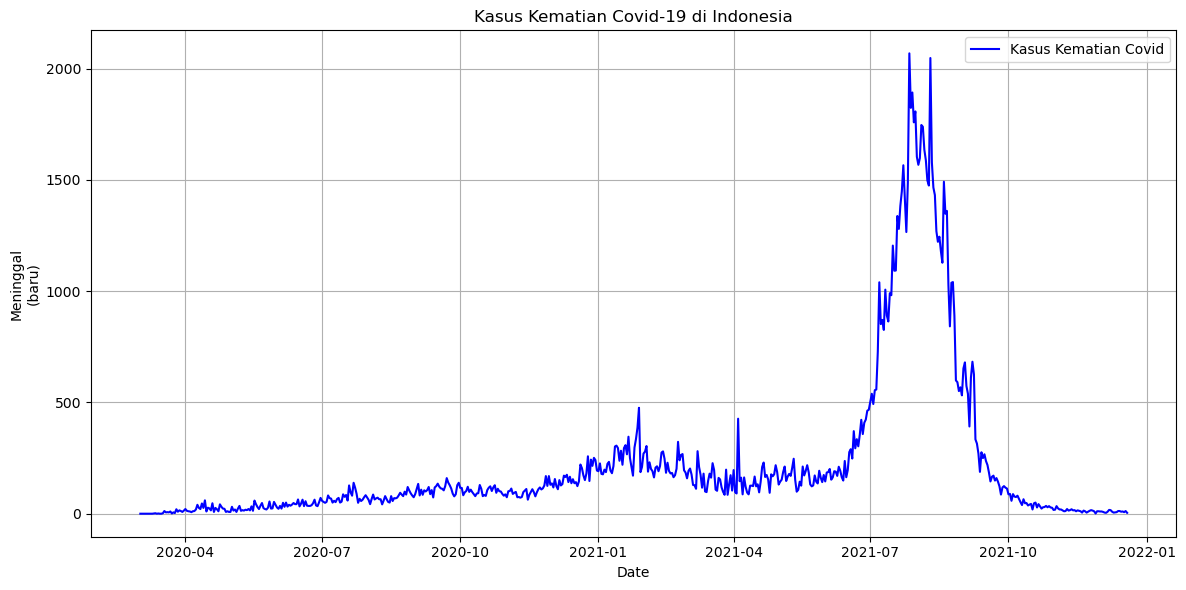

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Meninggal\n(baru)'], color='blue', label='Kasus Kematian Covid')
plt.title('Kasus Kematian Covid-19 di Indonesia')
plt.xlabel('Date')
plt.ylabel('Meninggal\n(baru)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

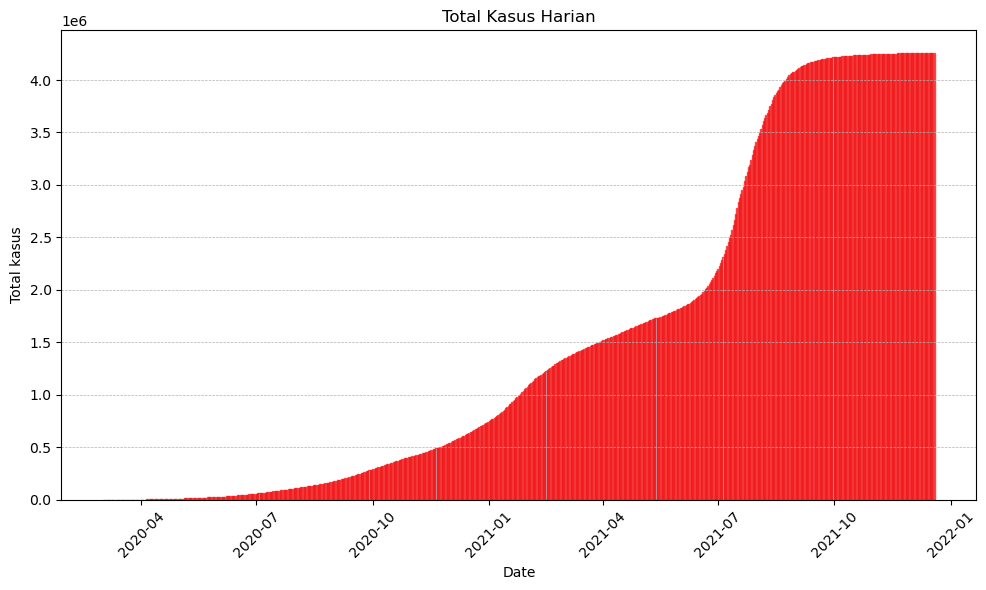

In [17]:
#barchart for daily cases
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Total kasus'],
color='skyblue', edgecolor='red', alpha=0.7)
plt.title('Total Kasus Harian')
plt.xlabel('Date')
plt.ylabel('Total kasus')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()

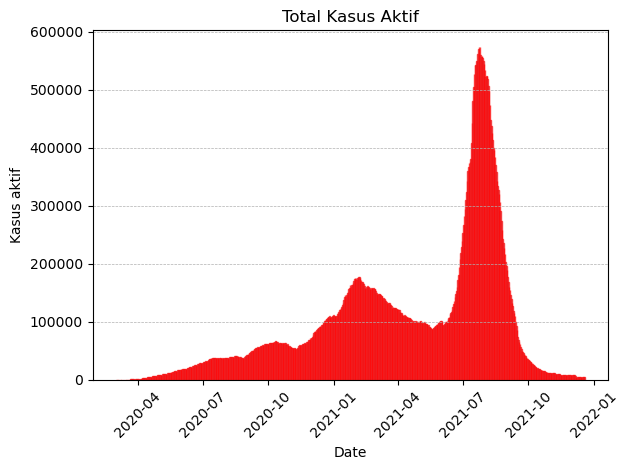

In [18]:
# Membuat vertical bar chart untuk kasus aktif
plt.bar(df['Date'], df['Kasus aktif'],
color='skyblue', edgecolor='red', alpha=0.7)
plt.title('Total Kasus Aktif')
plt.xlabel('Date')
plt.ylabel('Kasus aktif')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()

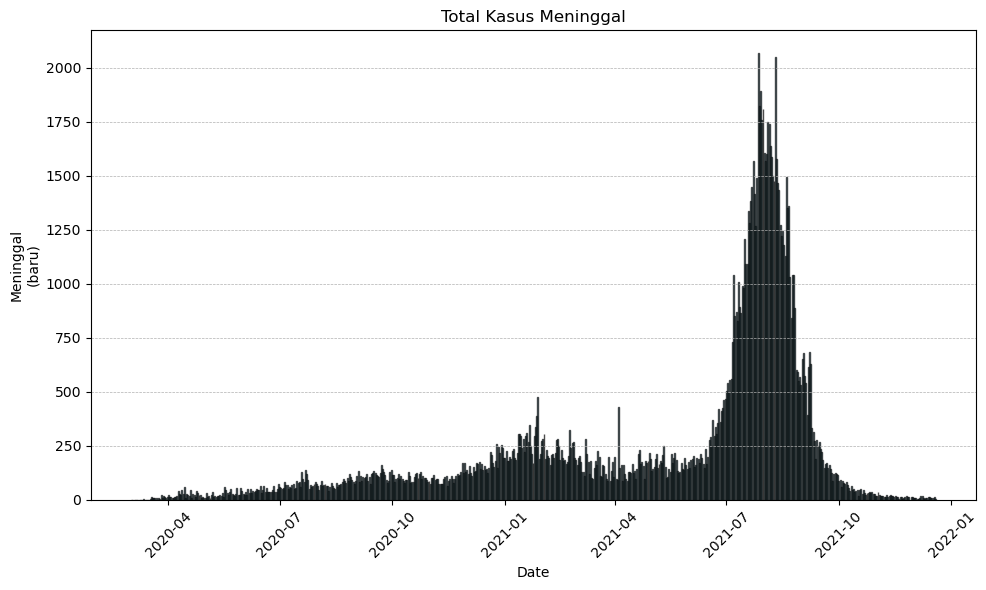

In [19]:
# Membuat vertical bar chart untuk total kasus Meninggal
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Meninggal\n(baru)'],
color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Total Kasus Meninggal')
plt.xlabel('Date')
plt.ylabel('Meninggal\n(baru)')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()

#### Berdasarkan visualisasi data di atas, kita dapat melihat bahwa jumlah kasus Covid tiba-tiba meningkat dari bulan Juni 2021 hingga Agustus 2021 dan kemudian menurun lagi pada bulan Oktober 2021. Begitu pula dengan jumlah kematian yang disebabkan oleh Covid juga mengalami peningkatan pada periode yang sama. Jika kita ingat, peningkatan ini terjadi setelah hari raya Idul Fitri. Peningkatan tersebut merupakan anomali pada data ini, dimana kasus mengingkat secara signifikan pada tanggal 25 Juli 2021, dengan total 573.908 kasus. Hal ini terjadi tepat setelah libur Idul Fitri. Oleh karena itu, diperkirakan peningkatan tersebut disebabkan oleh arus pemudik yang mempercepat penyebaran virus.


In [20]:
def hitung_total(df, *args):
    totals = [df[col].sum() for col in args]
    return totals

# Penggunaan fungsi:
total_kasus_harian, total_kasus_sembuh, total_kasus_meninggal = hitung_total(df, 'Kasus harian', 'Sembuh\n(baru)', 'Meninggal\n(baru)')

print("Total Kasus Harian: ", total_kasus_harian)
print("Total Kasus Sembuh: ", total_kasus_sembuh)
print("Total Kasus Meninggal: ", total_kasus_meninggal)


Total Kasus Harian:  4260537.0
Total Kasus Sembuh:  4111617.0
Total Kasus Meninggal:  144000.0


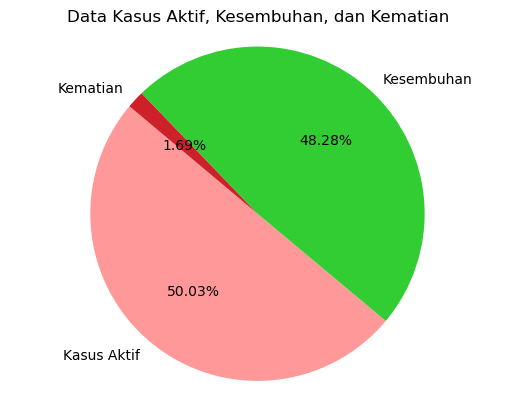

In [21]:
# Data kasus aktif, kesembuhan, dan kematian
data = [total_kasus_harian, total_kasus_sembuh, total_kasus_meninggal]
labels = ['Kasus Aktif', 'Kesembuhan', 'Kematian']
colors = ['#ff9999', '#32CD32', '#CE2029']

# Membuat pie chart
plt.pie(data, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.axis('equal')  # Aspek rasio yang sama memastikan bahwa pie chart digambar sebagai lingkaran.

plt.title('Data Kasus Aktif, Kesembuhan, dan Kematian')

plt.show()


#### Jika dilihat dari data di atas, secara angka jumlah kematian bisa dianggap cukup besar yaitu sekitar 144 ribu jiwa, namun jika kita bandingkan dengan keseluruhan kasus, ternyata tingkat kematian tersebut tak lebih dari 1.7%. Pada data total kasus kematian dan kesembuhan, terdapat selisih dengan kasus aktif sekitar 4.920 jiwa, padahal seharusnya total kasus kematian dan sembuh sama dengan kasus aktif. Adanya selisih jumlah ini diperkiraan bahwa 4.920 orang tersebut masih dalam perawatan COVID. 

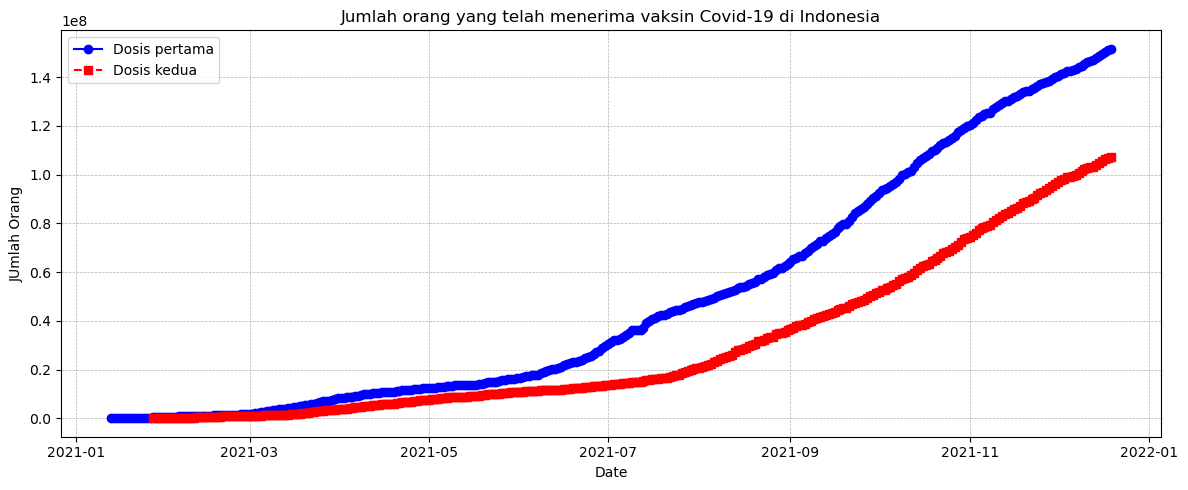

In [22]:
# Membuat line plot pemberian vaksin 
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Dosis pertama'], color='blue',
marker='o', label='Dosis pertama')
plt.plot(df['Date'], df['Dosis kedua'], color='red',
marker='s', linestyle='--', label='Dosis kedua')
plt.title('Jumlah orang yang telah menerima vaksin Covid-19 di Indonesia')
plt.xlabel('Date')
plt.ylabel('JUmlah Orang')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

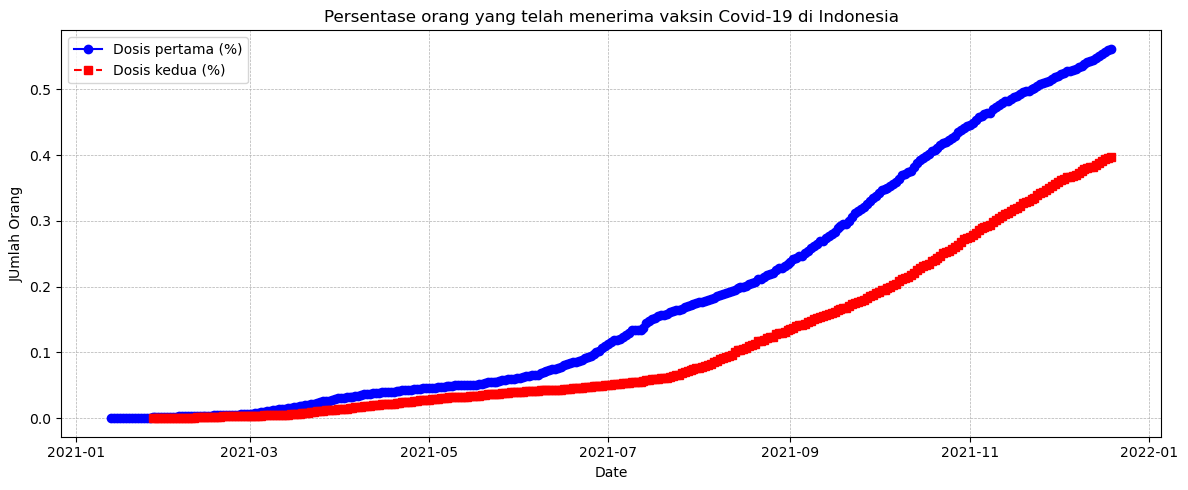

In [23]:
# Membuat line plot persentase pemberian vaksin 
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Dosis pertama (%)'], color='blue',
marker='o', label='Dosis pertama (%)')
plt.plot(df['Date'], df['Dosis kedua (%)'], color='red',
marker='s', linestyle='--', label='Dosis kedua (%)')
plt.title('Persentase orang yang telah menerima vaksin Covid-19 di Indonesia')
plt.xlabel('Date')
plt.ylabel('JUmlah Orang')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

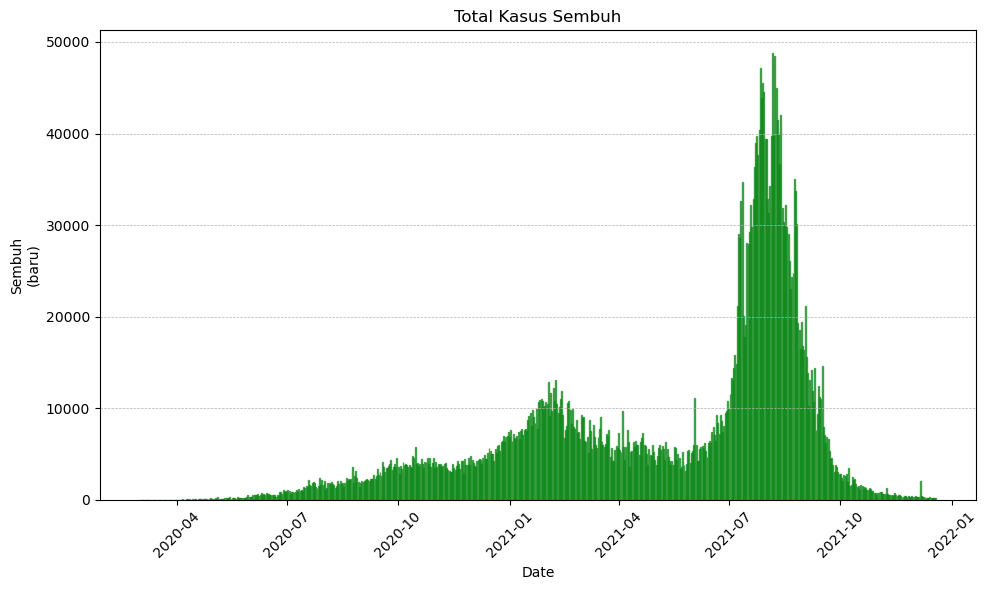

In [24]:
# Membuat vertical bar chart untuk total kasus sembuh
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Sembuh\n(baru)'],
color='skyblue', edgecolor='green', alpha=0.7)
plt.title('Total Kasus Sembuh')
plt.xlabel('Date')
plt.ylabel('Sembuh\n(baru)')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()

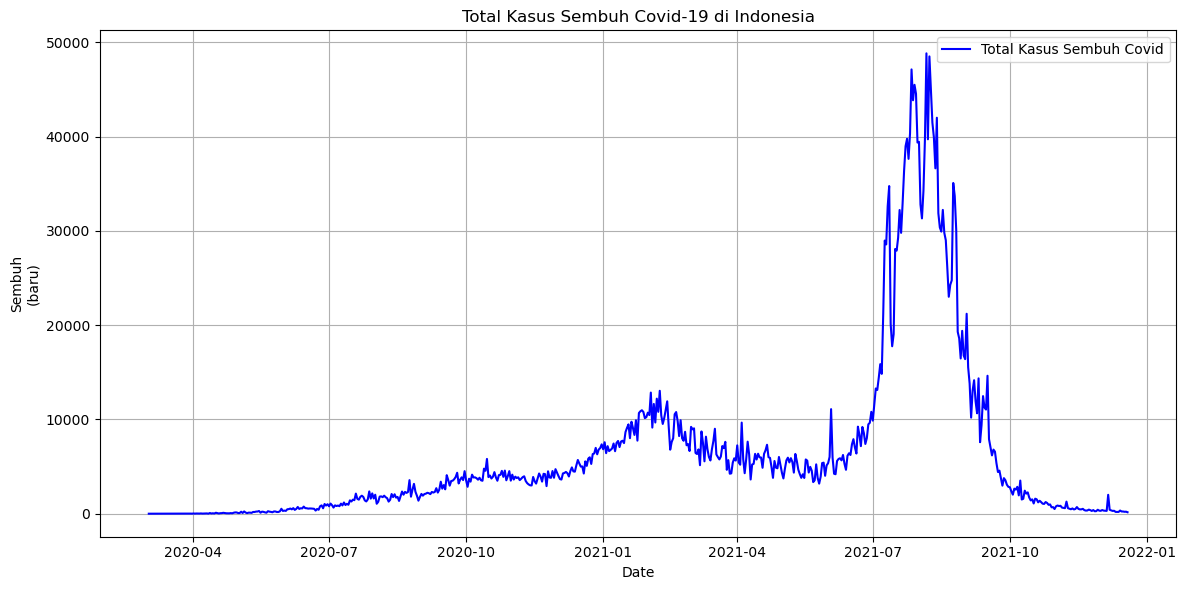

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sembuh\n(baru)'], color='blue', label='Total Kasus Sembuh Covid')
plt.title('Total Kasus Sembuh Covid-19 di Indonesia')
plt.xlabel('Date')
plt.ylabel('Sembuh\n(baru)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Dengan meningkatnya pemberian vaksin dosis pertama dan kedua yang dimulai pada bulan Juli 2021 dan berlanjut hingga Januari 2022, hal ini juga berdampak pada menurunnya jumlah kasus Covid, dan jumlah kematian akibat kasus-kasus tersebut juga berangsur-angsur menurun.

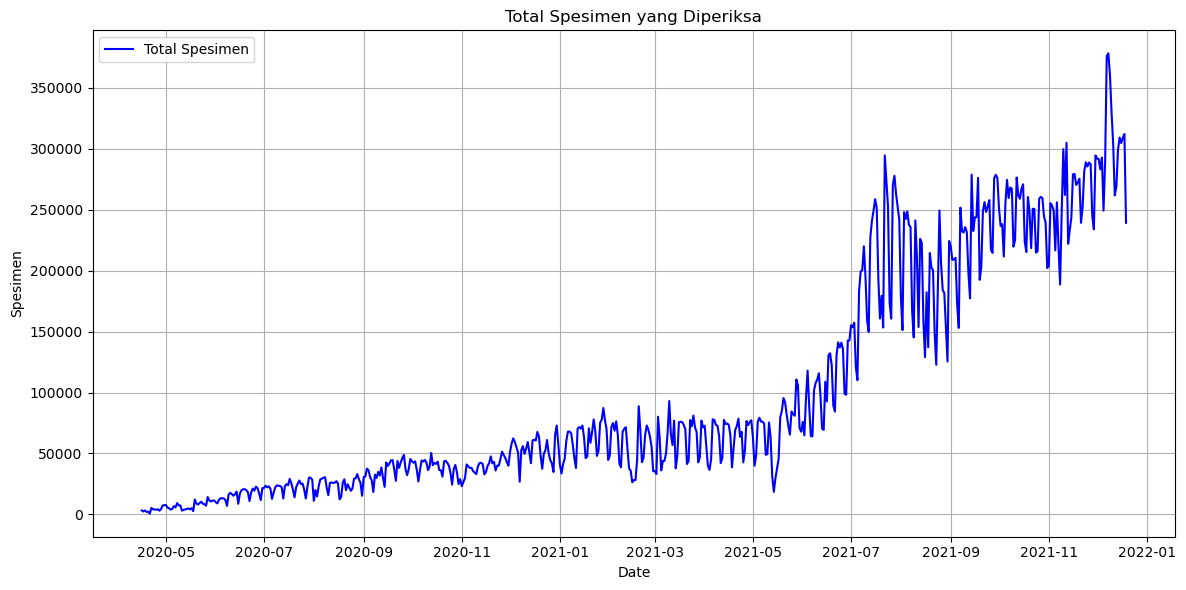

In [36]:
# Banyak spesimen harian
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Spesimen'], color='blue', label='Total Spesimen')
plt.title('Total Spesimen yang Diperiksa')
plt.xlabel('Date')
plt.ylabel('Spesimen')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Spesimen terlihat semakin banyak dilakukan dan meningkat terus hingga awal tahun 2022

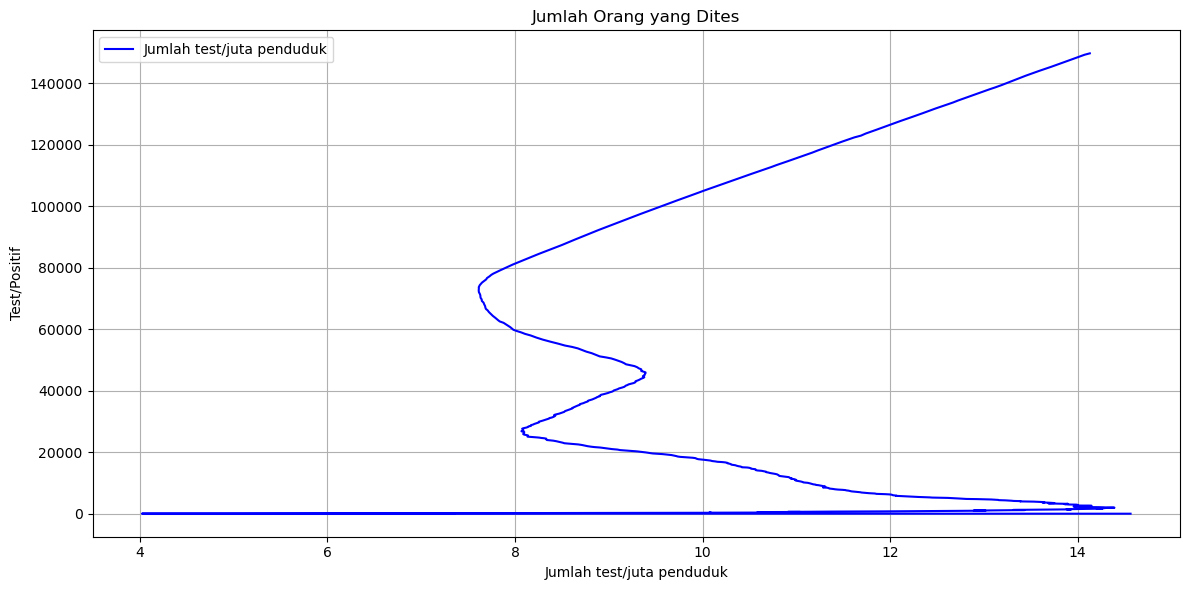

In [38]:
# Banyak orang yang dites vs hasil yang positif
plt.figure(figsize=(12, 6))
plt.plot(df['Test/Positif'], df['Jumlah test/juta penduduk'], color='blue', label='Jumlah test/juta penduduk')
plt.title('Jumlah Orang yang Dites')
plt.ylabel('Test/Positif')
plt.xlabel('Jumlah test/juta penduduk')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Seiring berjalannya waktu, jumlah penduduk yang dites covid semakin banyak dan berbanding lurus juga dengan bertambahnya hasill test yang positif

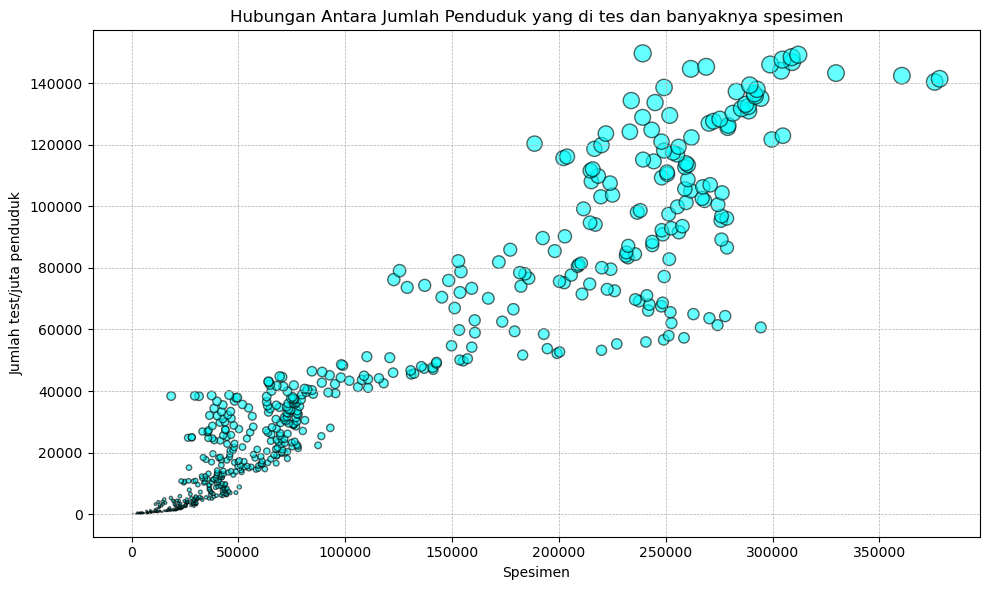

In [29]:
# Menggunakan jumlah penduduk untuk menentukan ukuran titik
sizes = df['Jumlah test/juta penduduk'] / 1000
plt.figure(figsize=(10, 6))
plt.scatter(df['Spesimen'],
df['Jumlah test/juta penduduk'], color='cyan', alpha=0.6, s=sizes,
edgecolors='black')
plt.title('Hubungan Antara Jumlah Penduduk yang di tes dan banyaknya spesimen')
plt.ylabel('Jumlah test/juta penduduk')
plt.xlabel('Spesimen')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

#### Angka spesimen terlihat lebih besar dari jumlah penduduk yang dites, ini artinya ada spesimen yang dilakukan lebih dari sekali kepada orang yang sama, hal ini diperkirakan untuk mengecek bagaimana progres penyembuhan orang tersebut setelah dilakukannya perawatan.

In [32]:
df1 = pd.DataFrame({'Tingkat kesembuhan': df['Tingkat kesembuhan (seluruh kasus)'], 'Tingkat kematian': df['Tingkat kematian (seluruh kasus)'],
                    'Tingkat positivitas mingguan': df['Tingkat positivitas mingguan'], 'Kasus harian': df['Kasus harian']})


<AxesSubplot:>

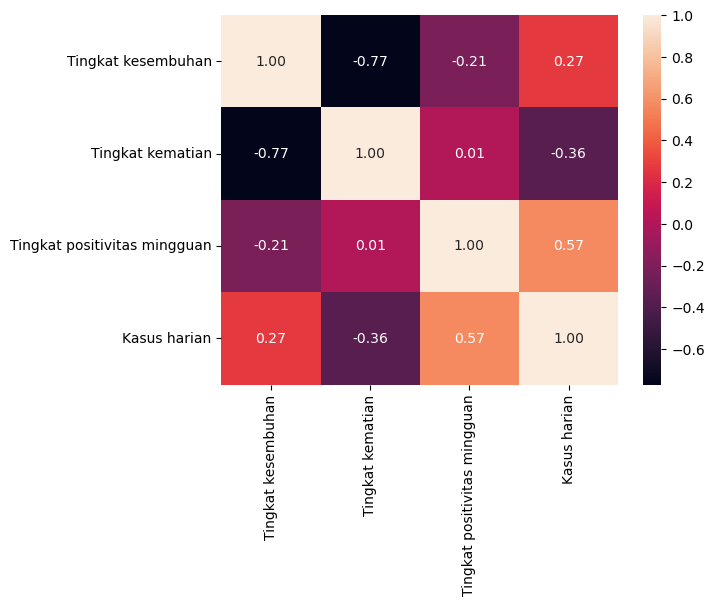

In [33]:
# correlation heatmap
correlation = df1.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

#### Dari tabel diatas, terlihat adanya korelasi yang kuat antara tingkat kesembuhan dan tingkat kematian dengan angka korelasinya sebesar -0.77, sedangkan tingkat positifitas mingguan juga memiliki korelasi positif dengan kasus harian, meskipun hanya 0.57.

In [34]:
# SQL Query to retrieve the top 5 highest positive cases in June between 2020 and 2021
import pandas as pd
import sqlite3

# Load the CSV file into a DataFrame
data = pd.read_csv('data_covid1.csv')

# Membuat koneksi ke database
conn = sqlite3.connect(':memory:')

# Menyimpan DataFrame ke database
data.to_sql('data_covid1', conn, index=False)

# Menjalankan query SQL
query = '''
SELECT Date, "Kasus Harian"
FROM data_covid1
WHERE (DATE(Date) LIKE '2020-06%' OR DATE(Date) LIKE '2021-06%')
ORDER BY "Kasus Harian" DESC
LIMIT 5
'''

# Mengeksekusi query dan menyimpan hasilnya dalam DataFrame
data2 = pd.read_sql_query(query, conn)

# Menampilkan hasil
print(data2)

# Menutup koneksi ke database
conn.close()

         Date  Kasus harian
0  2021-06-30       21807.0
1  2021-06-27       21342.0
2  2021-06-26       21095.0
3  2021-06-28       20694.0
4  2021-06-24       20574.0


#### Diatas merupakan kasus harian tertinggi pada bulan Juni dari tahun 2020 dan Juni 2021, dikarenakan jumlah kasus 2021 lebih banyak, maka sudah sewajarnya 5 kasus tertinggi tersebut berasal dari Juni tahun 2021.